In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:/Programming/Notes/ML/Workshop/Linear Regession/Instagram_data.csv",encoding ="latin1")

In [3]:
df.head(5)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
df.isna().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [7]:
df.nunique()

Impressions       101
From Home          97
From Hashtags     100
From Explore       95
From Other         84
Saves              84
Comments           15
Shares             28
Likes              85
Profile Visits     59
Follows            29
Caption            90
Hashtags           54
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Impressions,119.0,5703.991597,4843.780105,1941.0,3467.0,4289.0,6138.0,36919.0
From Home,119.0,2475.789916,1489.386348,1133.0,1945.0,2207.0,2602.5,13473.0
From Hashtags,119.0,1887.512605,1884.361443,116.0,726.0,1278.0,2363.5,11817.0
From Explore,119.0,1078.100840,2613.026132,0.0,157.5,326.0,689.5,17414.0
From Other,119.0,171.092437,289.431031,9.0,38.0,74.0,196.0,2547.0
Saves,119.0,153.310924,156.317731,22.0,65.0,109.0,169.0,1095.0
Comments,119.0,6.663866,3.544576,0.0,4.0,6.0,8.0,19.0
Shares,119.0,9.361345,10.089205,0.0,3.0,6.0,13.5,75.0
Likes,119.0,173.781513,82.378947,72.0,121.5,151.0,204.0,549.0
Profile Visits,119.0,50.621849,87.088402,4.0,15.0,23.0,42.0,611.0


In [9]:
#Correalation Matrix
correlation_matrix= df.corr()
print(correlation_matrix)

impressions_correalations=correlation_matrix['Impressions'].drop('Impressions')
print(impressions_correalations)

                Impressions  From Home  From Hashtags  From Explore  \
Impressions        1.000000   0.844698       0.560760      0.893607   
From Home          0.844698   1.000000       0.177516      0.800573   
From Hashtags      0.560760   0.177516       1.000000      0.190453   
From Explore       0.893607   0.800573       0.190453      1.000000   
From Other         0.592960   0.555666       0.229623      0.495685   
Saves              0.779231   0.768817       0.305929      0.747803   
Comments          -0.028524   0.012716       0.161439     -0.158565   
Shares             0.634675   0.674985       0.219511      0.615731   
Likes              0.849835   0.698330       0.662124      0.653699   
Profile Visits     0.760981   0.531076       0.691345      0.531850   
Follows            0.889363   0.672675       0.555485      0.796019   

                From Other     Saves  Comments    Shares     Likes  \
Impressions       0.592960  0.779231 -0.028524  0.634675  0.849835   
From Ho

In [10]:
df.corr

<bound method DataFrame.corr of      Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Shar

## Feature Engineering

In [11]:
df['Enagagement Rate']= (df['Likes'] + df['Comments'] + df['Shares']) / df['Impressions']
#updated data frame
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,Enagagement Rate
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...,0.044898
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...,0.045421
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...,0.035563
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...,0.050795
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...,0.052423


In [12]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Impressions,3920,5394,4021,4528,2518,3884,2621,3541,3749,4115
From Home,2586,2727,2085,2700,1704,2046,1543,2071,2384,2609
From Hashtags,1028,1838,1188,621,255,1214,599,628,857,1104
From Explore,619,1174,0,932,279,329,333,500,248,178
From Other,56,78,533,73,37,43,25,60,49,46
Saves,98,194,41,172,96,74,22,135,155,122
Comments,9,7,11,10,5,7,5,4,6,6
Shares,5,14,1,7,4,10,1,9,8,3
Likes,162,224,131,213,123,144,76,124,159,191
Profile Visits,35,48,62,23,8,9,26,12,36,31


## Exploratory Data Analysis 

In [13]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags', 'Enagagement Rate'],
      dtype='object')

Text(0.5, 1.0, 'Trend of reach over time')

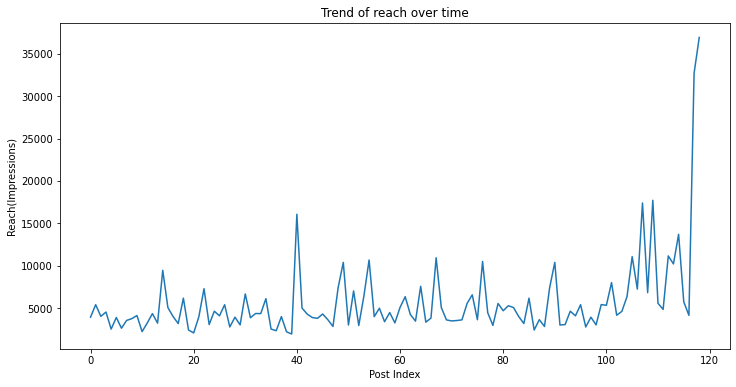

In [14]:
#Trend of reach over time
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index,y=df['Impressions'])
plt.xlabel('Post Index')
plt.ylabel('Reach(Impressions)')
plt.title('Trend of reach over time')

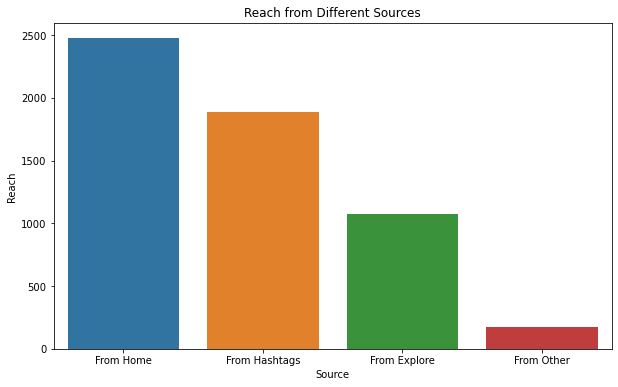

In [15]:
#Trends Reach from Different Sources
plt.figure(figsize=(10, 6))
sns.barplot(x=['From Home', 'From Hashtags', 'From Explore', 'From Other'],
            y=[df['From Home'].mean(), df['From Hashtags'].mean(), df['From Explore'].mean(), df['From Other'].mean()])
plt.xlabel('Source')
plt.ylabel('Reach')
plt.title('Reach from Different Sources')
plt.show()

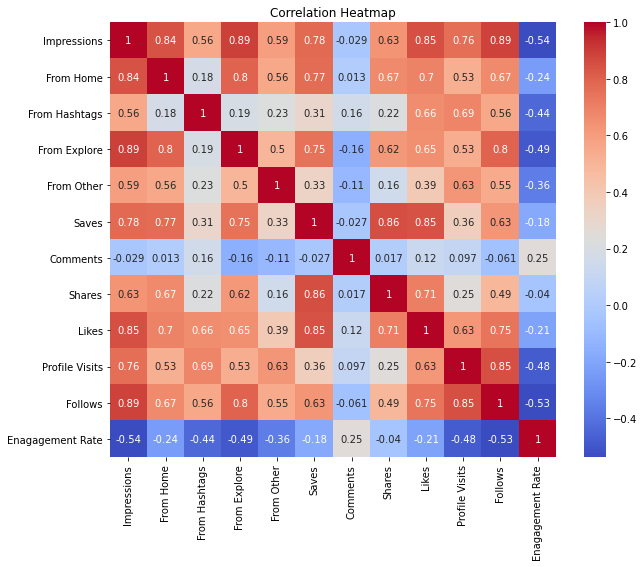

In [16]:
#Correlation Between Features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
df.index

RangeIndex(start=0, stop=119, step=1)

In [18]:
#df.columns()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df=pd.read_csv("F:/Programming/Notes/ML/Workshop/Linear Regession/Instagram_data.csv",encoding ="latin1")

#Creating Features
X=df[['From Home', 'From Hashtags', 'From Explore','From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']]
y=df['Impressions']

#Split Train Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Training the model
Model=LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

In [20]:
#prediction ion test data
y_pred= Model.predict(X_test)

In [21]:
#Evaluate the model's performance
MSE= mean_squared_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)
MEA=mean_absolute_error(y_test,y_pred)

print('Mean_Squared_Error', MSE)
print('Mean_Absolute_Error',MEA)
print('R_squared score',R2)

Mean_Squared_Error 15766.226496309113
Mean_Absolute_Error 83.83232873523902
R_squared score 0.99959404890355


In [22]:
new_data= pd.DataFrame({'From Home':[10],
                        'From Hashtags':[5], 
                        'From Explore': [2],
                        'From Other':[3],
                        'Saves':[50], 
                        'Comments':[20],
                        'Shares':[10], 
                        'Likes':[100],
                        'Profile Visits':[30], 
                        'Follows':[5]
                       })
predicted_reach=Model.predict(new_data)
print('Predicted_Reach',predicted_reach)

Predicted_Reach [82.23340518]
